In [19]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
# Access Data  
df = pd.read_csv('BA_reviews.csv')
df.head()

,reviews
0,✅ Trip Verified | Old A320 with narrow pitch....
1,✅ Trip Verified | Another BA Shambles. Starte...
2,Not Verified | BA cancelled my flight home to...
3,"Not Verified | BA cancelled my flight home, t..."
4,✅ Trip Verified | Turned up 3.5 hours in advan...


In [3]:
# Data Description
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | Old A320 with narrow pitch....
freq,1


In [4]:
null_check = pd.isnull(df)
null_check

,reviews
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


# Natural Language Toolkit

To work with human language data.
Also used Word cloud to visualize the average content in the review

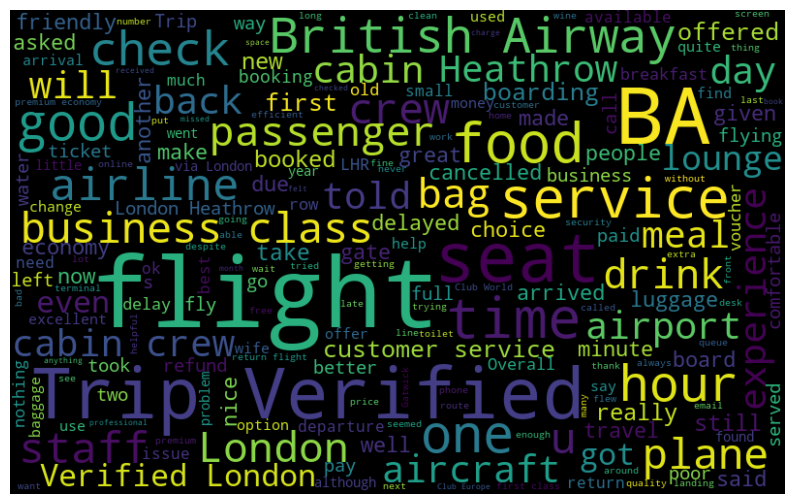

In [5]:
all_words = ' '.join([text for text in df['reviews']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

rlist = list(df['reviews'])
len(rlist)

In [20]:
from textblob import TextBlob
df["sentiment_score"] = df["reviews"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],['neg', 'neu', 'pos'])

In [21]:
df['sentiment_score']

0      0.286905
1      0.293125
2     -0.227500
3     -0.020455
4     -0.021053
         ...   
995    0.247222
996    0.174588
997    0.027778
998    0.063831
999    0.006706
Name: sentiment_score, Length: 1000, dtype: float64

In [22]:
df['sentiment']

0      pos
1      pos
2      neg
3      neg
4      neg
      ... 
995    pos
996    pos
997    pos
998    pos
999    pos
Name: sentiment, Length: 1000, dtype: object

In [23]:
df.head()

,reviews,sentiment_score,sentiment
0,✅ Trip Verified | Old A320 with narrow pitch....,0.286905,pos
1,✅ Trip Verified | Another BA Shambles. Starte...,0.293125,pos
2,Not Verified | BA cancelled my flight home to...,-0.227500,neg
3,"Not Verified | BA cancelled my flight home, t...",-0.020455,neg
4,✅ Trip Verified | Turned up 3.5 hours in advan...,-0.021053,neg


In [28]:
df.to_csv('BA_sentiment.csv')
sdf = pd.read_csv('BA_sentiment.csv')

In [27]:
df.head(5)

,reviews,sentiment_score,sentiment
0,✅ Trip Verified | Old A320 with narrow pitch....,0.286905,pos
1,✅ Trip Verified | Another BA Shambles. Starte...,0.293125,pos
2,Not Verified | BA cancelled my flight home to...,-0.227500,neg
3,"Not Verified | BA cancelled my flight home, t...",-0.020455,neg
4,✅ Trip Verified | Turned up 3.5 hours in advan...,-0.021053,neg


(array([  4.,   1.,  16.,  64., 175., 350., 231., 111.,  35.,  13.]),
 array([-0.76666667, -0.6185    , -0.47033333, -0.32216667, -0.174     ,
        -0.02583333,  0.12233333,  0.2705    ,  0.41866667,  0.56683333,
         0.715     ]),
 <BarContainer object of 10 artists>)

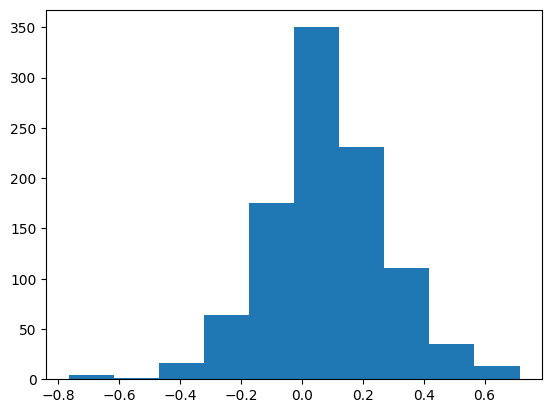

In [30]:
plt.hist(x = df['sentiment_score'])

In [80]:
# positive = 1
# negative = 2
# neutral = 3
sdf = df.replace(to_replace=['pos', 'neg','neu'], value=[1,2,3])

In [89]:
sdf

,reviews,sentiment_score,sentiment,label
0,✅ Trip Verified | Old A320 with narrow pitch....,0.286905,1,1
1,✅ Trip Verified | Another BA Shambles. Starte...,0.293125,1,1
2,Not Verified | BA cancelled my flight home to...,-0.227500,2,0
3,"Not Verified | BA cancelled my flight home, t...",-0.020455,2,0
4,✅ Trip Verified | Turned up 3.5 hours in advan...,-0.021053,2,0
...,...,...,...,...
995,✅ Trip Verified | Heathrow to Keflavik. I had...,0.247222,1,1
996,✅ Trip Verified | London to Muscat first clas...,0.174588,1,1
997,✅ Trip Verified | My family and I travelled f...,0.027778,1,1
998,✅ Trip Verified | Gatwick to Madeira. The fli...,0.063831,1,1


In [111]:
a=sdf['label'].value_counts()[1]

In [112]:
c=sdf['label'].value_counts()[3]

# For some reason I can't get the 2 ie Negative Sentiment so I will Calculate it manually as I have computer the other values.
# a + b + c = 1000
# 672 + b+ 9 = 1000
# 681 + b = 1000
# b = 1000 - 681
# b = 319

In [114]:
b = 319

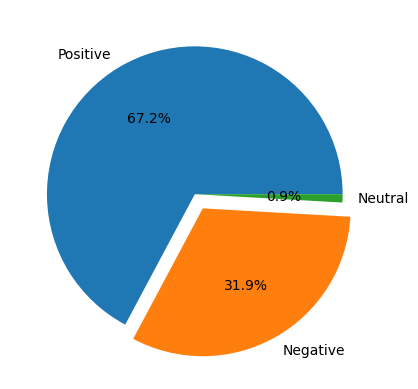

In [133]:
y = np.array([a,b,c])
mylabels = ["Positive", "Negative", "Neutral"]

def func(pct):
  return "{:1.1f}%".format(pct)

plt.pie(y,labels = mylabels,autopct=lambda pct: func(pct),explode=[0,0.11,0])
plt.show() 

## There are more Positive Reviews Than Negative and Neutral Comments.

In [155]:
nsent = df.loc[df["sentiment"] =='neg' ]
nsent

,reviews,sentiment_score,sentiment,label
2,Not Verified | BA cancelled my flight home to...,-0.227500,neg,0
3,"Not Verified | BA cancelled my flight home, t...",-0.020455,neg,0
4,✅ Trip Verified | Turned up 3.5 hours in advan...,-0.021053,neg,0
8,✅ Trip Verified | Stupidly tried BA again aft...,-0.045455,neg,0
10,✅ Trip Verified | Glasgow to London delayed b...,-0.112500,neg,0
...,...,...,...,...
982,✅ Trip Verified | Flew Belfast to London with ...,-0.152778,neg,0
983,✅ Trip Verified | Naples to Gatwick. The onlin...,-0.111029,neg,0
984,✅ Trip Verified | I have been flying with BA f...,-0.008956,neg,0
991,✅ Trip Verified | Fort Lauderdale to Gatwick....,-0.035938,neg,0


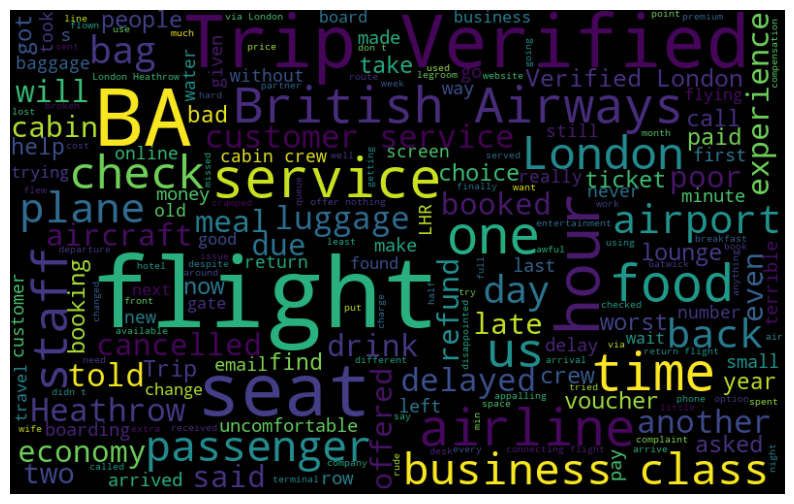

In [156]:
all_words = ' '.join([text for text in nsent['reviews']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()